In [2]:
import struct
from PIL import Image
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import skimage.io as io
from skimage.filters import threshold_otsu
from PIL import Image



%matplotlib inline

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=12x45 at 0x2612BCF2EF0>
12 45
(14, 47)


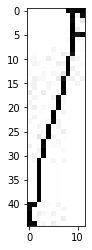

In [51]:

# main문
#np.set_printoptions(threshold=sys.maxsize)
img = Image.open("dataset_thinning/test111.jpg")
print(img)
width, height = img.size
imshow(np.asarray(img))
print(width, height)
#print(np.array(img))
img_Copy = np.array(img)
img_Copy = np.array(img)< 125

test = np.zeros((width+2,height+2))
testXY=[]
print(test.shape)
for j in range(height):
    for i in range(width):
        if img_Copy[j][i][0] == 1:
            test[i+1][j+1]=1
            testXY.append((i+1,j+1))

In [52]:
def neighbours(x,y,image):
    "해당하는 점에 대하여 주변 픽셀 8개를 지정해줌"
    img = image
    x_1, y_1, x1, y1 = x-1, y-1, x+1, y+1
    return [ img[x_1][y], img[x_1][y1], img[x][y1], img[x1][y1],     # P2,P3,P4,P5
                img[x1][y], img[x1][y_1], img[x][y_1], img[x_1][y_1] ]    # P6,P7,P8,P9


def transitions(neighbours):
    "주변 픽셀을 9시방향부터 시작하여 시계방향으로 돌렸을 때 두픽셀이 0->1로 되는 갯수"
    n = neighbours + neighbours[0:1]      # P2, P3, ... , P8, P9, P2
    return sum( (n1, n2) == (0, 1) for n1, n2 in zip(n, n[1:]) )  # (P2,P3), (P3,P4), ... , (P8,P9), (P9,P2)

def breaking(neighbours):
    vertical = neighbours[0]+neighbours[4]
    horizontal = neighbours[2]+neighbours[6]
    
    diagonal_LU = neighbours[5]+neighbours[1]
    diagonal_RU = neighbours[3]+neighbours[7]
    
    result=True
    if (np.sum(vertical)==2 and np.sum(horizontal)!=2 and np.sum(diagonal_LU)!=2 and np.sum(diagonal_RU)!=2 ):
        result=False
    if(np.sum(vertical)!=2 and np.sum(horizontal)==2 and np.sum(diagonal_LU)!=2 and np.sum(diagonal_RU)!=2 ):
        result=False
    if(np.sum(vertical)!=2 and np.sum(horizontal)!=2 and np.sum(diagonal_LU)==2 and np.sum(diagonal_RU)!=2 ):
        result=False
    if(np.sum(vertical)!=2 and np.sum(horizontal)!=2 and np.sum(diagonal_LU)!=2 and np.sum(diagonal_RU)==2 ):
        result=False    
    return result
    

def featuring(image):
    "끝점 분기점 꺽인점 찾기"
    Image_Thinned = image.copy()  # 이미지를 복사하여 넣음

        
    rows, columns = Image_Thinned.shape               # x for rows, y for columns

    
    tail=[]
    bifur = []
    breakpoint = [] 
    tempB=[]
 
    #    # Step 꺽이는점
    #    elif (Image_Thinned[x][y] == 1 and sum(n) == 2 and transitions(n) == 2 and breaking(n)==True):         
    #        breakpoint.append((x,y))
   
    
    tempT=1
    while tempT:
        
        #print("와일문시작")
        tempT=[]
        
        for x,y in testXY:
            #print("와일문시작1")
            P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, Image_Thinned)
            if (Image_Thinned[x][y] == 1 and sum(n)<3 and transitions(n) == 1):  
                tail.append((x,y)) 
                    # Step 분기점
            elif (Image_Thinned[x][y] == 1 and sum(n) >= 3 and transitions(n) >= 3):
                bifur.append((x,y))
            #elif (Image_Thinned[x][y] == 1 and transitions(n) == 2 and breaking(n)==True):   
            elif Image_Thinned[x][y] == 1 and transitions(n) == 2:
                breakpoint.append((x,y))
        
        for x1, y1 in tail: #노이즈 제거
            #print(x1,y1)
            for x2,y2 in bifur:
                length=math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
                if length<8:
                    tempT.append((x1,y1))

        for x,y in tempT:
            Image_Thinned[x][y] = 0
        
        for x1,y1 in breakpoint:# 특징점 주변을 검사하지 않음
            for x2,y2 in bifur:
                length=math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
                if length<10:
                    tempB.append((x1,y1))
            for x3,y3 in tail:
                length=math.sqrt((x1 - x3) ** 2 + (y1 - y3) ** 2)
                if length<5 and not (x1,y1) in tempB:
                    tempB.append((x1,y1))
                    
        if tempT:
            del tail[:]
            del bifur[:]
            del breakpoint[:]
            del tempB[:]
            
            
    bpResult=set(breakpoint)-set(tempB)
    
    
    getbp=[]
    binbp=[]
    for x1,y1 in bpResult:
        if not (x1,y1) in binbp:
            for x2,y2 in bpResult:
                length=math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)#1
                if length<4:
                        binbp.append((x2,y2))
                        if not (x1,y1) in getbp:
                            getbp.append((x1,y1))
                            

                
    gettail=[]
    bintail=[]
    for x1,y1 in tail:
        if not (x1,y1) in bintail:
            for x2,y2 in tail:
                length=math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)#2
                if length<4:
                        bintail.append((x2,y2))
                        if not (x1,y1) in gettail:
                            gettail.append((x1,y1))                        
                        
    getbf=[]
    binbf=[]
    for x1,y1 in bifur:
        if not (x1,y1) in binbf:
            for x2,y2 in bifur:
                length=math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)#3
                if length<4:
                        binbf.append((x2,y2))
                        if not (x1,y1) in getbf:
                            getbf.append((x1,y1))                              
                        
                        
    allfeature=set(getbp)|set(gettail)|set(getbf)
    print(allfeature)
    
    breakresults1=[] 
    
    for x1,y1 in getbp:
        
        lengthresult=9999
        xr2=yr2=0
        
        for x2,y2 in allfeature:
            if (x1,y1)!=(x2,y2):
                length=math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)#4
                if lengthresult > length:
                    lengthresult=length
                    xr2,yr2 = x2,y2
                    
        lengthresult=9999
        xr3=yr3=0
        for x3,y3 in allfeature:
            if (x1,y1)!=(x3,y3) and (xr2,yr2)!=(x3,y3):
                length1=math.sqrt((x1 - x3) ** 2 + (y1 - y3) ** 2)
                length2=math.sqrt((xr2 - x3) ** 2 + (yr2 - y3) ** 2)
                if length1<length2 and lengthresult > length1 and length1<15:
                    lengthresult=length1
                    xr3,yr3 = x3,y3
        
        xx1=xr2-x1
        yy1=yr2-y1
        if xx1==0:
            xx1=0.000000000001
        
        xx2=xr3-x1
        yy2=yr3-y1
        if xx2==0:
            xx2=0.000000000001
        
        angle=0
        o1=0
        o2=0
        geto1=0
        geto2=0
        
        if xx1>=0 and yy1>=0:
            o1 = math.atan(yy1/xx1)
            geto1 = math.degrees(o1)
            
        elif xx1<=0 and yy1>=0: 
            o1 = math.atan(yy1/xx1)
            geto1 = 180 + math.degrees(o1)
            
        elif xx1<=0 and yy1<=0:
            o1 = math.atan(yy1/xx1)
            geto1 = 180 + math.degrees(o1)
            
        elif xx1>=0 and yy1<=0:
            o1 = math.atan(yy1/xx1)
            geto1 = 360 + math.degrees(o1)
            
        # x1,y1 x2,y2 각각을 다 계산해야함 둔각 예각일때가 있으므로 
        if xx2>=0 and yy2>=0:
            o2 = math.atan(yy2/xx2)
            geto2 = math.degrees(o2)
            
        elif xx2<=0 and yy2>=0:
            o2 = math.atan(yy2/xx2)
            geto2 = 180 + math.degrees(o2)
            
        elif xx2<=0 and yy2<=0:
            o2 = math.atan(yy2/xx2)
            geto2 = 180 + math.degrees(o2)
            
        elif xx2>=0 and yy2<=0:
            o2 = math.atan(yy2/xx2)
            geto2 = 360 + math.degrees(o2)
            

        print(geto1,geto2)
        angle=abs(geto1-geto2)
        
        if angle>180:
            angle=angle-180
        
        if angle>30 and angle<150 and xr3!=0 and yr3!=0:
            breakresults1.append((x1,y1))
            print("xy와 각도",x1,y1,angle,"인접 점",xr2,yr2,"인접점2",xr3,yr3)

    for x, y in gettail: 
        Image_Thinned[x][y] = 2            
    for x, y in getbf: 
        Image_Thinned[x][y] = 3
    for x, y in getbp: 
        Image_Thinned[x][y] = 4 
    for x, y in breakresults1: 
        Image_Thinned[x][y] = 5
    

            
    return Image_Thinned

In [53]:
get_test=featuring(test)



{(7, 21), (3, 35), (3, 40), (2, 45), (9, 11), (5, 26), (4, 31), (8, 16), (11, 6)}
281.30993247402023 111.80140948635182
284.03624346792645 89.99999999998855
101.30993247402021 291.8014094863518
104.03624346792647 281.30993247402023
101.30993247402021 291.8014094863518
101.30993247402021 281.30993247402023
270.0000000000115 101.30993247402021


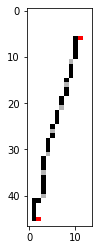

In [54]:
import matplotlib.image as img

import matplotlib.pyplot as pp

image = Image.new("RGB",(width+2,height+2),(255,255,255))
im = image.load()

for j in range(height+2):
    for i in range(width+2):

        if(get_test[i][j]==1):
            R = 0
            G = 0
            B = 0
            im[i,j] = (R,G,B)
        elif(get_test[i][j]==2): #끝점
            R = 255
            G = 0
            B = 0
            im[i,j] = (R,G,B)
        elif(get_test[i][j]==3): #초록 분기점
            R = 0 
            G = 255
            B = 0
            im[i,j] = (R,G,B)
        elif(get_test[i][j]==4):#비선별
            R = 180
            G = 180
            B = 180
            im[i,j] = (R,G,B)
        elif(get_test[i][j]==5):#파랑 꺾인곳
            R = 0
            G = 0
            B = 255
            im[i,j] = (R,G,B)


pp.imshow(np.asarray(image))
pp.show()
#image.save("testss.bmp")
#image.close()

In [50]:
# 3개의 점에 대한 거리를 비교해보자 지정 점에서 두점까지의 거리와 두점사이의 거리가 짧은게 있으면 fail
# ex 45,5 의점을 기준으로 49,10에서 45,14까지의 거리가 45,5에서 45,14까지 거리보다 짧은경우 fail이란소리
# 한점에 대해 가까운점 한점과 다른 한점간의 거리를 비교하여 긴것들을 append하고 그중 가장 짧은 다른점을 고른다.